In [1]:
import pandas as pd
import glob
import os
import plotly.io as pio
import re
from datetime import datetime

pio.templates.default = "plotly_dark"
pio.renderers.default = "jpeg"

path = r'../TradeCSVs/'  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

pre_li = []
post_li = []

for filename in all_files:
    x = re.search("\d.......", filename)
    file_date = datetime.strptime(x[0], "%Y%m%d") 
    split_date = datetime.strptime("20220721", "%Y%m%d")
    #print(file_date)
    df = pd.read_csv(filename, delimiter="|", names=[
        "datetime", "tickType", "time", "price", "volume", "tickAttribLast", "exchange", "specialConditions"])
    if file_date <= split_date:
        pre_li.append(df)
    else:
        post_li.append(df)
        
pre_df = pd.concat(pre_li, axis=0, ignore_index=True)
post_df = pd.concat(post_li, axis=0, ignore_index=True)
pre_df["cost"] = pre_df.price * pre_df.volume
post_df["cost"] = post_df.price * post_df.volume

def filterSignals(df):
    l300 = df.loc[df['volume'] == 300]
    l400 = df.loc[df['volume'] == 400]
    l500 = df.loc[df['volume'] == 500]
    l505 = df.loc[df['volume'] == 505]
    l600 = df.loc[df['volume'] == 600]
    l700 = df.loc[df['volume'] == 700]
    l777 = df.loc[df['volume'] == 777]
    l800 = df.loc[df['volume'] == 800]
    l900 = df.loc[df['volume'] == 900]
    l911 = df.loc[df['volume'] == 911]
    l1000 = df.loc[df['volume'] == 1000]
    l2100 = df.loc[df['volume'] == 2100]

    signals_df = pd.concat([l300,
                              l400,
                              l500,
                              l505,
                              l600,
                              l700,
                              l777,
                              l800,
                              l900,
                              l911,
                              l1000,
                              l2100, ])
    return signals_df

pre_signals = filterSignals(pre_df)
post_signals = filterSignals(post_df)

pre_exchange_all_count = pre_signals.exchange.value_counts()
pre_exchange_signals_count = pre_signals.exchange.value_counts()
post_exchange_all_count = post_signals.exchange.value_counts()
post_exchange_signals_count = post_signals.exchange.value_counts()

#df['price_decimals'] = df.apply(lambda x: str(x['price'])[::-1].find('.'), axis=1)


In [2]:
print(f"""Pre Split
Number of trades: {len(pre_df)}
Total volume of all trades: {pre_df["volume"].sum()} 

Max Volume pr trade: {pre_df.volume.max()}
Mean Volume pr trade: {pre_df.volume.mean()}
Median volume pr trade: {pre_df.volume.median()}

Min Price: {pre_df.price.min()}
Max Price: {pre_df.price.max()}

Min cost pr trade: {pre_df.cost.min()}
Max cost pr trade: {pre_df.cost.max()}
Mean cost pr trade: {pre_df.cost.mean()}
Median cost pr trade: {pre_df.cost.median()}
""")


Pre Split
Number of trades: 4247948
Total volume of all trades: 211865153 

Max Volume pr trade: 363485
Mean Volume pr trade: 49.8747049163502
Median volume pr trade: 10.0

Min Price: 77.77
Max Price: 161.63

Min cost pr trade: 77.77
Max cost pr trade: 49146806.85
Mean cost pr trade: 6144.8072084192145
Median cost pr trade: 1260.0



In [23]:
print(f"""Post split
Number of trades: {len(post_df)}
Total volume of all trades: {post_df["volume"].sum()} 

Max Volume pr trade: {post_df.volume.max()}
Mean Volume pr trade: {post_df.volume.mean()}
Median volume pr trade: {post_df.volume.median()}

Min Price: {post_df.price.min()}
Max Price: {post_df.price.max()}

Min cost pr trade: {post_df.cost.min()}
Max cost pr trade: {post_df.cost.max()}
Mean cost pr trade: {post_df.cost.mean()}
Median cost pr trade: {post_df.cost.median()}
""")

Post split
Number of trades: 7220908
Total volume of all trades: 639833554 

Max Volume pr trade: 2462825
Mean Volume pr trade: 88.60846225987092
Median volume pr trade: 30.0

Min Price: 15.41
Max Price: 47.99

Min cost pr trade: 15.42
Max cost pr trade: 51226760.0
Mean cost pr trade: 2522.0215847937648
Median cost pr trade: 833.28



In [3]:
import plotly.graph_objs as go
def highlight_signals(fig, df):
    fig.add_trace(
        go.Scatter(
            x=[300],
            y=[df[300]],
            mode="text",
            text="🔻",
            name="🔻 Down",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[400],
            y=[df[400]],
            mode="text",
            text="➡️",
            name="➡️ Sideways",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[500],
            y=[df[500]],
            mode="text",
            text="💥",
            name="💥 Gap it",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[505],
            y=[df[505]],
            mode="text",
            text="🤷‍♂️",
            name="🤷‍♂️ I am short on shares ",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[600],
            y=[df[600]],
            mode="text",
            text="🔹",
            name="🔹 Resistance",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[700],
            y=[df[700]],
            mode="text",
            text="💹",
            name="💹 UP!",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[777],
            y=[df[777]],
            mode="text",
            text="💹",
            name="💹 UP!",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[800],
            y=[df[800]],
            mode="text",
            text="🔊",
            name="🔊 Volume coming",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[900],
            y=[df[900]],
            mode="text",
            text="🕊️",
            name="🕊️ Trade free",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[911],
            y=[df[911]],
            mode="text",
            text="📰",
            name="📰 NEWS",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[1000],
            y=[df[1000]],
            mode="text",
            text="🛑",
            name="🛑 Don't let it run",
            marker={"color": "blue"}
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[2100],
            y=[df[2100]],
            mode="text",
            text="🚀",
            name="🚀 Let it run",
            marker={"color": "blue"}
        )
    )


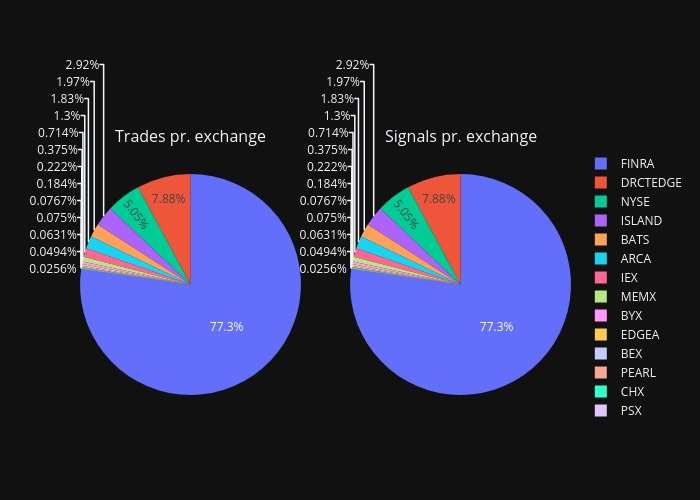

FileNotFoundError: [Errno 2] No such file or directory: 'analysis-htmls/prePie.html'

In [4]:
from plotly.subplots import make_subplots
fig0 = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]],subplot_titles=("Trades pr. exchange","Signals pr. exchange"))
fig0.add_trace(
go.Pie(labels=pre_exchange_all_count.index, values=pre_exchange_all_count.values),
   row=1, col=1 
)
fig0.add_trace(
go.Pie(labels=pre_exchange_signals_count.index, values=pre_exchange_signals_count.values),
   row=1, col=2 
)
fig0.show()
fig0.write_html(f'analysis-htmls/prePie.html')

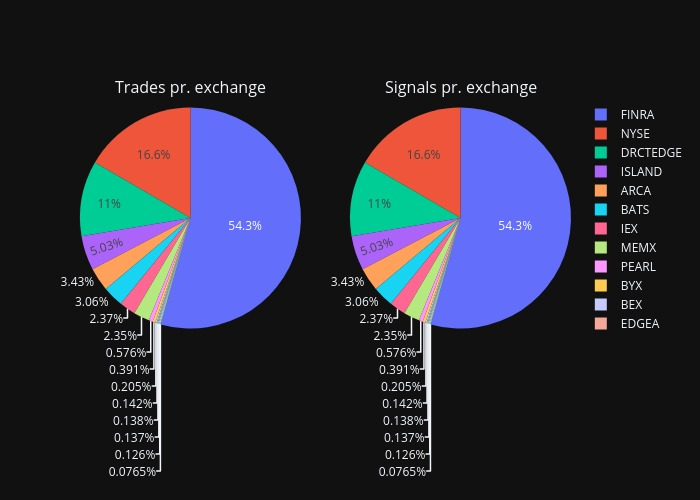

FileNotFoundError: [Errno 2] No such file or directory: 'analysis-htmls/postPie.html'

In [5]:
from plotly.subplots import make_subplots
fig02 = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]],subplot_titles=("Trades pr. exchange","Signals pr. exchange"))
fig02.add_trace(
go.Pie(labels=post_exchange_all_count.index, values=post_exchange_all_count.values),
   row=1, col=1 
)
fig02.add_trace(
go.Pie(labels=post_exchange_signals_count.index, values=post_exchange_signals_count.values),
   row=1, col=2 
)
fig02.show()
fig02.write_html(f'analysis-htmls/postPie.html')

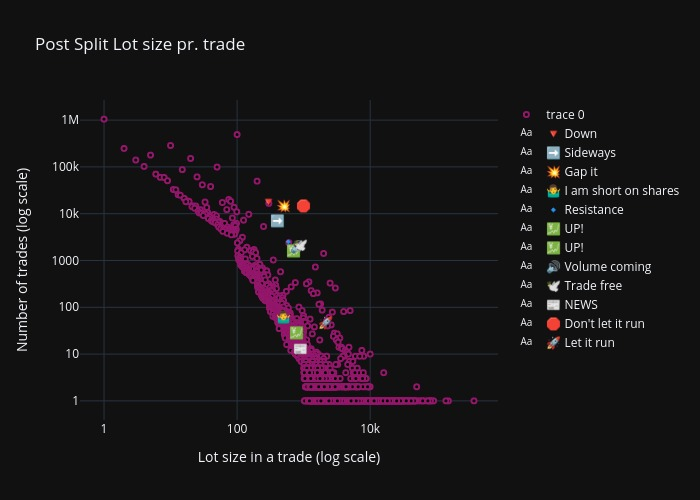

FileNotFoundError: [Errno 2] No such file or directory: 'analysis-htmls/preLotPrTrade.html'

In [6]:
from locale import normalize


pre_volume_count = pre_df.volume.value_counts()
volume_count_norm = pre_df.volume.value_counts(normalize=True)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=pre_volume_count.index, y=pre_volume_count.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))))
fig1.update_yaxes(type="log")
fig1.update_xaxes(type="log")
fig1.update_layout(title="Post Split Lot size pr. trade", xaxis_title="Lot size in a trade (log scale)", yaxis_title="Number of trades (log scale)" )
highlight_signals(fig1, pre_volume_count)
fig1.show()
fig1.write_html(f'analysis-htmls/preLotPrTrade.html')


In [ ]:
from locale import normalize

post_volume_count = post_df.volume.value_counts()
volume_count_norm = post_df.volume.value_counts(normalize=True)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=post_volume_count.index, y=post_volume_count.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))))
fig1.update_yaxes(type="log")
fig1.update_xaxes(type="log")
fig1.update_layout(title="Post Split Lot size pr. trade", xaxis_title="Lot size in a trade (log scale)", yaxis_title="Number of trades (log scale)" )
highlight_signals(fig1, post_volume_count)
fig1.show()
fig1.write_html(f'analysis-htmls/postLotPrTrade.html')

In [ ]:

pre_vol_x_index = pd.DataFrame(pre_volume_count)
pre_vol_x_index["volume"] = pre_vol_x_index.index * pre_vol_x_index.volume
pre_vol_x_index = pre_vol_x_index.squeeze()
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=pre_vol_x_index.index, y=pre_vol_x_index.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))))
fig2.update_yaxes(type="log")
fig2.update_xaxes(type="log")
fig2.update_layout(title="Pre Split Cost pr. lot size", xaxis_title="Cost pr. lot (log scale)", yaxis_title="Cost (log scale)" )
highlight_signals(fig2, pre_vol_x_index)
fig2.show()
fig1.write_html(f'analysis-htmls/preCostPrLot.html')

In [ ]:
post_vol_x_index = pd.DataFrame(post_volume_count)
post_vol_x_index["volume"] = post_vol_x_index.index * post_vol_x_index.volume
post_vol_x_index = post_vol_x_index.squeeze()
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=post_vol_x_index.index, y=post_vol_x_index.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))))
fig2.update_yaxes(type="log")
fig2.update_xaxes(type="log")
fig2.update_layout(title="Post Split Cost pr. lot size", xaxis_title="Post Split Cost pr. lot (log scale)", yaxis_title="Cost (log scale)" )
highlight_signals(fig2, post_vol_x_index)
fig2.show()
fig2.write_html(f'analysis-htmls/postCostPrLot.html')

In [ ]:
pre_cost_count = pre_df.cost.round().value_counts()
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=pre_cost_count.index, y=pre_cost_count.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2)) ))
fig3.update_yaxes(type="log")
fig3.update_xaxes(type="log")
fig3.update_layout(title="Pre Split Number of trades sorted by cost (rounded)", xaxis_title="Cost (log scale)", yaxis_title="Occurences (log scale)" )
fig3.show()
fig3.write_html(f'analysis-htmls/preCountSortCost.html')

In [ ]:
pre_cost_count = pre_df.cost.round().value_counts()
pre_cost_count_df = pre_cost_count.to_frame()
pre_cost_count_df["sum"] = pre_cost_count.index * pre_cost_count.values
#print(pre_cost_count_df)
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=pre_cost_count_df.index, y=pre_cost_count_df["sum"], mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2)) ))
fig3.update_yaxes(type="log")
fig3.update_xaxes(type="log")
fig3.update_layout(title="Pre Split Number of trades sorted by cost (rounded) total sum", xaxis_title="Cost (log scale)", yaxis_title="Sum (log scale)" )
fig3.show()
fig3.write_html(f'analysis-htmls/preCountSortCostTotalsum.html')

In [ ]:
post_cost_count = post_df.cost.round().value_counts()
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=post_cost_count.index, y=post_cost_count.values, mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2)) ))
fig3.update_yaxes(type="log")
fig3.update_xaxes(type="log")
fig3.update_layout(title="Post Split Number of trades sorted by cost (rounded)", xaxis_title="Cost (log scale)", yaxis_title="Occurences (log scale)" )
fig3.show()
fig3.write_html(f'analysis-htmls/postCountSortCost.html')

In [ ]:
post_cost_count = post_df.cost.round().value_counts()
post_cost_count_df = post_cost_count.to_frame()
post_cost_count_df["sum"] = post_cost_count.index * post_cost_count.values
#print(post_cost_count_df)
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=post_cost_count_df.index, y=post_cost_count_df["sum"], mode="markers",marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2)) ))
fig3.update_yaxes(type="log")
fig3.update_xaxes(type="log")
fig3.update_layout(title="Post Split Number of trades sorted by cost (rounded) total sum", xaxis_title="Cost (log scale)", yaxis_title="Sum (log scale)" )
fig3.show()
fig3.write_html(f'analysis-htmls/postCountSortCostTotalSum.html')

In [ ]:
pre_price_count = pre_df.price.round(decimals=2).value_counts()
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=pre_price_count.index, y=pre_price_count.values, mode="markers", 
        marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))
        ))
fig4.update_yaxes(type="log")
fig4.update_layout(title="Pre Split Number of trades at different prices", xaxis_title="Price", yaxis_title="Number of trades (log scale)" )
fig4.show()
fig4.write_html(f'analysis-htmls/preTradesAtPrice.html')

In [ ]:
post_price_count = post_df.price.round(decimals=2).value_counts()
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=post_price_count.index, y=post_price_count.values, mode="markers", 
        marker=dict(color='Black',size=5,line=dict(color='#93176b',width=2))
        ))
fig4.update_yaxes(type="log")
fig4.update_layout(title="Post Split Number of trades at different prices", xaxis_title="Price", yaxis_title="Number of trades (log scale)" )
fig4.show()
fig4.write_html(f'analysis-htmls/postTradesAtPrice.html')

In [ ]:
from datetime import datetime
from io import StringIO

pre_signals['date'] = pd.to_datetime(pre_signals.datetime).dt.date
post_signals['date'] = pd.to_datetime(post_signals.datetime).dt.date

combined_signals = pd.concat([pre_signals, post_signals])
signals_pr_day = combined_signals.groupby(["date"], as_index=False).volume.value_counts(normalize=False)
signals_pr_day_norm = combined_signals.groupby(["date"], as_index=False).volume.value_counts(normalize=True)

spd_csv = signals_pr_day.to_csv()
spd_csv_norm = signals_pr_day_norm.to_csv()

histo_df = pd.read_csv(StringIO(spd_csv), delimiter=",", names=[
        "date", "signal", "count"])
histo_norm_df = pd.read_csv(StringIO(spd_csv_norm), delimiter=",", names=[
        "date", "signal", "count"])


In [ ]:
from numpy import histogram
import plotly.express as px
histogram = go.Figure()
histogram = px.histogram(histo_df, x="date", y="count", color="signal")
histogram.show()
histogram.write_html(f'analysis-htmls/signalsCountHisto.html')

In [ ]:
from numpy import histogram
import plotly.express as px
histogram = go.Figure()
histogram = px.histogram(histo_norm_df, x="date", y="count", color="signal")
histogram.show()
histogram.write_html(f'analysis-htmls/signalsCountNormHisto.html')

In [ ]:
signal_exchanges_pr_day = combined_signals.groupby(["date"], as_index=False).exchange.value_counts(normalize=False)
signal_exchanges_norm = combined_signals.groupby(["date"], as_index=False).exchange.value_counts(normalize=True)

sepd_csv = signal_exchanges_pr_day.to_csv()
sepd_csv_norm = signal_exchanges_norm.to_csv()

histo_ex_df = pd.read_csv(StringIO(sepd_csv), delimiter=",", names=[
        "date", "signal", "count"])
histo_ex_norm_df = pd.read_csv(StringIO(sepd_csv_norm), delimiter=",", names=[
        "date", "signal", "count"])

In [ ]:
from numpy import histogram
import plotly.express as px
histogram = go.Figure()
histogram = px.histogram(histo_ex_df, x="date", y="count", color="signal")
histogram.show()
histogram.write_html(f'analysis-htmls/signalsExchangesCountHisto.html')

In [ ]:
from numpy import histogram
import plotly.express as px
histogram = go.Figure()
histogram = px.histogram(histo_ex_norm_df, x="date", y="count", color="signal")
histogram.show()
histogram.write_html(f'analysis-htmls/signalsExchangesNormCountHisto.html')


In [ ]:
pre_df['date'] = pd.to_datetime(pre_df.datetime).dt.date
post_df['date'] = pd.to_datetime(post_df.datetime).dt.date

combined_all = pd.concat([pre_df, post_df])

exchanges_pr_day = combined_all.groupby(["date"], as_index=False).exchange.value_counts(normalize=False)
exchanges_norm = combined_all.groupby(["date"], as_index=False).exchange.value_counts(normalize=True)

aepd_csv = exchanges_pr_day.to_csv()
aepd_csv_norm = exchanges_norm.to_csv()

histo_aex_df = pd.read_csv(StringIO(aepd_csv), delimiter=",", names=[
        "date", "exchange", "count"])
histo_aex_norm_df = pd.read_csv(StringIO(aepd_csv_norm), delimiter=",", names=[
        "date", "exchange", "count"])

In [ ]:
from numpy import histogram
import plotly.express as px
histogram = go.Figure()
histogram = px.histogram(histo_aex_norm_df, x="date", y="count", color="exchange")
histogram.show()
histogram.write_html(f'analysis-htmls/allExchangesCountHisto.html')
